In [1]:
import torch
"""  
The torch.nn import gives us access to some helpful neural network things, such as various
neural network layer types 
(things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).
"""
import torch.nn as nn 
"""
The torch.nn.functional area specifically gives us access to some handy functions that we might not 
want to write ourselves. We will be using the relu or "rectified linear" activation 
function for our neurons. Instead of writing all of the code for these things, we can just import them, 
"""
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [2]:
""" 
All we're doing is just defining values for some layers, 
we're calling them fc1, fc2...etc, but you could call them whatever you wanted.
"""

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #  The fc just stands for fully connected
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    """The simplest neural network is fully connected, and feed-forward, meaning we go from input to output.
    In one side and out the other in a "forward" manner.  """
    ## forward propagation
    def forward(self, x):
        # her katman aktivasyon fonksiyonu ile çalışır
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # son layer da relu girmez
        x = self.fc4(x)
        # multi class output layer için softmax daha iyidir.
        # binary classification için ise sigmoid()
        # dim = 1 demek softmax daki oluşan 10 neuron için oluşan olasıkların toplamı 1 olmalı demek
        return F.log_softmax(x, dim=1)

#our nn object
net = Net()

print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [3]:
""" Şimdi random bir veri oluşturup kendi ağımıza input olarak vereceğiz"""

X = torch.rand((28,28))

# Our neural network wants this to be flattened,

X = X.view(-1,28*28)

In [4]:
output = net(X)
output

tensor([[-2.4482, -2.2557, -2.4065, -2.2806, -2.2526, -2.3749, -2.3015, -2.1830,
         -2.2501, -2.3021]], grad_fn=<LogSoftmaxBackward>)

In [10]:
import torch.optim as optim

"""
loss function gerçeklik ile nn deb gelen verileri karşılaştırır.
"""
#loss_function = nn.CrossEntropyLoss()
# lr is learing rate
optimizer = optim.Adam(net.parameters(), lr=0.001)

"""
So, for each epoch, and for each batch in our dataset, what do we do?

Grab the features (X) and labels (y) from current batch
Zero the gradients (net.zero_grad)
Pass the data through the network
Calculate the loss
Adjust weights in the network with the hopes of decreasing loss

"""

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is the batch of the features and labels
        X , y = data
        # her batch öncesi gradientler sıfırlanır loss hesaplama daha verimli olması için
        net.zero_grad()
        # veriyi view ile reshape yapıp flatten hale getiriyoruz
        output = net(X.view(-1,28*28))
        # calc and grab the loss value
        loss = F.nll_loss(output, y) 
        # apply this loss backwards thru the network's parameters
        loss.backward()
        # attempt to optimize weights to account for loss/gradients
        optimizer.step()  
    print(loss)  # print loss.

tensor(8.3942e-05, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)


In [11]:
correct = 0
total = 0
# eğittiğimiz modeli testset ile doğruluk oranı için deneyeceğiz
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.975


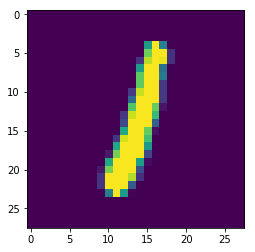

In [23]:
import matplotlib.pyplot as plt

plt.imshow(X[4].view(28,28))
plt.show()

In [22]:
# valiede etmek için bu yeterli, eğittiğimiz net modeline verdiğimiz X verisine ait inputkarın çıkrılarını argmax
# ile alarak test edebiliriz.
print(torch.argmax(net(X[4].view(-1,784))))

tensor(1)
